<a href="https://colab.research.google.com/github/thenameisAnurag/CV-DL/blob/main/Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image -> Label

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt


In [8]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
Y_test.shape

(10000, 1)

2D -> 1D

In [12]:
Y_train=Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])


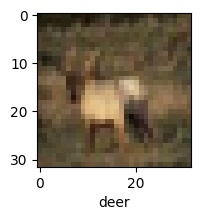

In [15]:
plot_sample(X_train,Y_train,3)

In [16]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [19]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,Y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3629 - accuracy: 0.5126
Epoch 2/3
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1677 - accuracy: 0.5880
Epoch 3/3
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0448 - accuracy: 0.6356


In [20]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.1574 - accuracy: 0.6000


[1.1574137210845947, 0.6000000238418579]

In [24]:
Y_test=Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

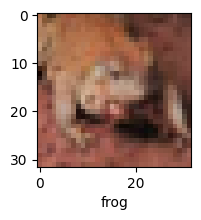

In [27]:
plot_sample(X_test,Y_test,5)